# Flight Price Prediction

Problem Statement:
    
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [36]:
data_train=pd.DataFrame(pd.read_excel(r"C:\Users\ankus\Downloads\train data.xlsx"))
data_test=pd.DataFrame(pd.read_excel(r"C:\Users\ankus\Downloads\Test_set.xlsx"))
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [37]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [38]:
data_train=data_train.dropna()

In [39]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [40]:
data_train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Label Encoding

In [43]:
#for training data
from sklearn.preprocessing import LabelEncoder

data_train = data_train.copy()
label_encoder = LabelEncoder()
for column in data_train.columns:
    data_train[column] = label_encoder.fit_transform(data_train[column]) 


#for test data
from sklearn.preprocessing import LabelEncoder

data_test = data_test.copy()
label_encoder = LabelEncoder()
for column in data_test.columns:
    data_test[column] = label_encoder.fit_transform(data_test[column]) 

In [44]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,65
1,1,6,3,0,84,31,906,336,1,8,669
2,4,43,2,1,118,70,413,106,1,8,1537
3,3,10,3,0,91,164,1324,311,0,8,389
4,3,0,0,5,29,149,1237,303,0,8,1457


# split training data into target and features variable

In [48]:
x=data_train.drop(['Price'],axis=1)
y=data_train['Price']

In [49]:
x

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3,24,0,5,18,211,233,240,4,8
1,1,6,3,0,84,31,906,336,1,8
2,4,43,2,1,118,70,413,106,1,8
3,3,10,3,0,91,164,1324,311,0,8
4,3,0,0,5,29,149,1237,303,0,8
...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,4,8
10679,1,29,3,0,64,193,1305,237,4,8
10680,4,29,0,2,18,58,824,280,4,8
10681,10,0,0,5,18,92,938,238,4,8


In [50]:
y

0          65
1         669
2        1537
3         389
4        1457
         ... 
10678      81
10679      84
10680     604
10681    1377
10682    1262
Name: Price, Length: 10682, dtype: int64

# check correlation

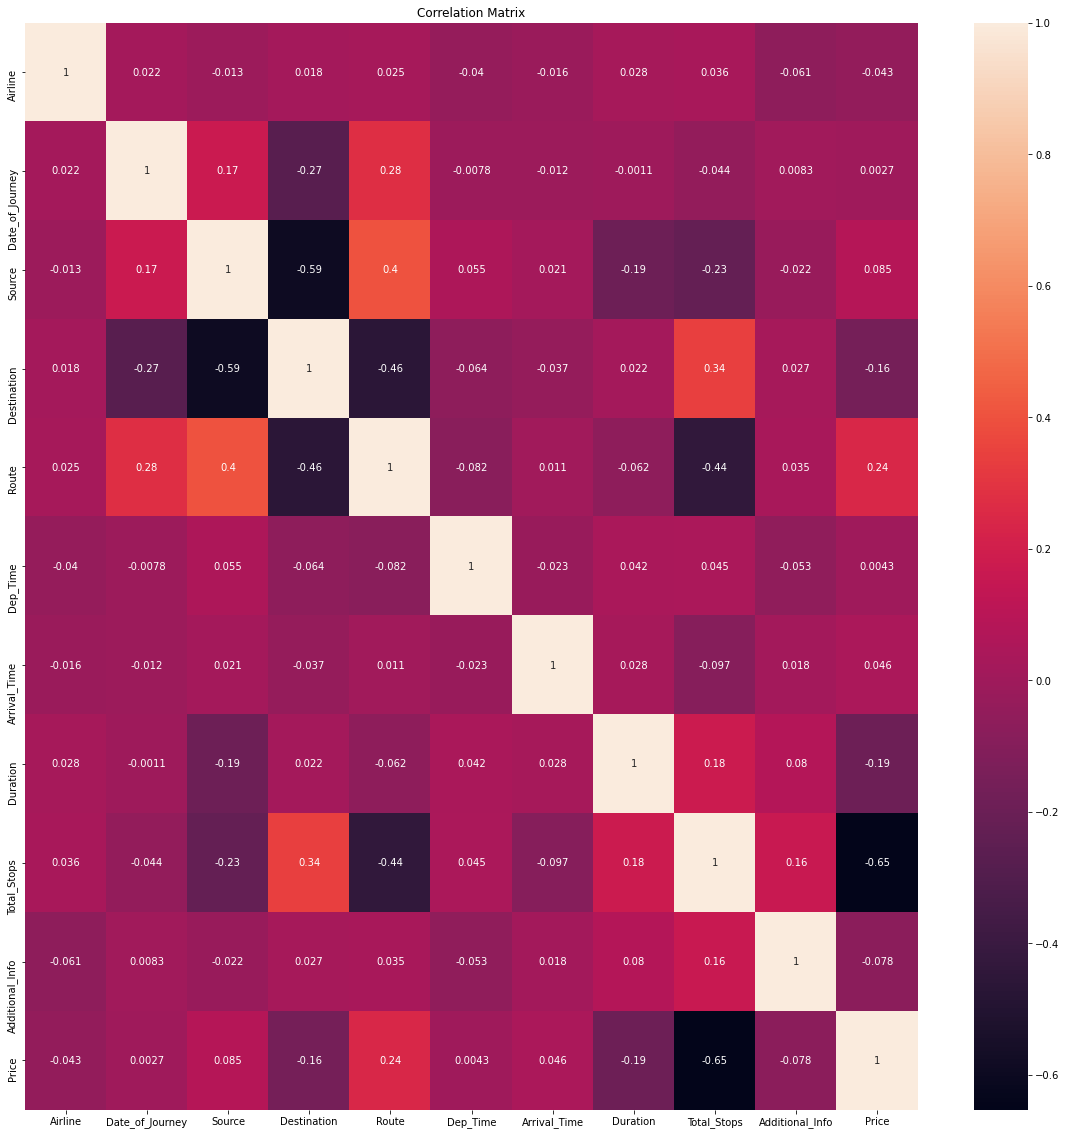

In [51]:
corr_mat=data_train.corr()

#size of the canvas
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [52]:
corr_mat["Price"].sort_values(ascending=False)

Price              1.000000
Route              0.243267
Source             0.085125
Arrival_Time       0.046415
Dep_Time           0.004291
Date_of_Journey    0.002661
Airline           -0.043069
Additional_Info   -0.078433
Destination       -0.156214
Duration          -0.191966
Total_Stops       -0.653305
Name: Price, dtype: float64

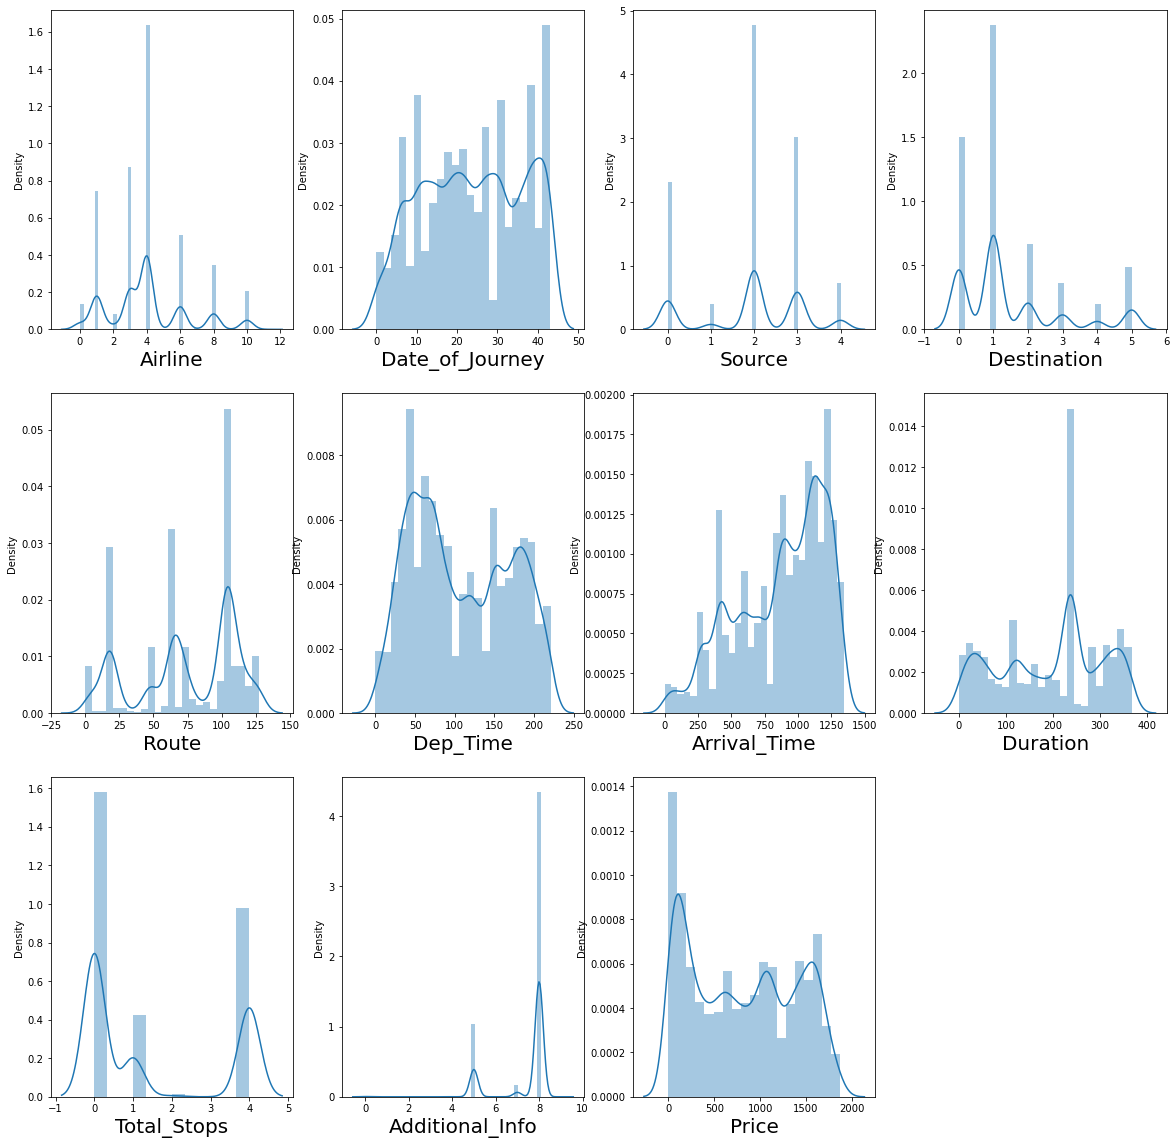

In [54]:
#let's see how data is distributed for every column
plt.figure(figsize=(20,20))
plotnumber=1

for column in data_train:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data_train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [55]:
#checking skewness
x.skew().sort_values()

Additional_Info   -1.779689
Arrival_Time      -0.606676
Route             -0.501911
Source            -0.424023
Duration          -0.213498
Date_of_Journey   -0.070718
Dep_Time           0.194914
Total_Stops        0.631532
Airline            0.731057
Destination        1.244046
dtype: float64

few columns are little skeweed so lets handle them

In [56]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [58]:
#validating that skewness has been removed or not
x.skew().sort_values()

Additional_Info   -1.371943
Route             -0.442919
Duration          -0.390739
Arrival_Time      -0.381687
Source            -0.238295
Date_of_Journey   -0.228702
Dep_Time          -0.150814
Airline           -0.015281
Destination        0.041570
Total_Stops        0.325086
dtype: float64

skewed columns are categorical so we proceed further

# checking for outliers

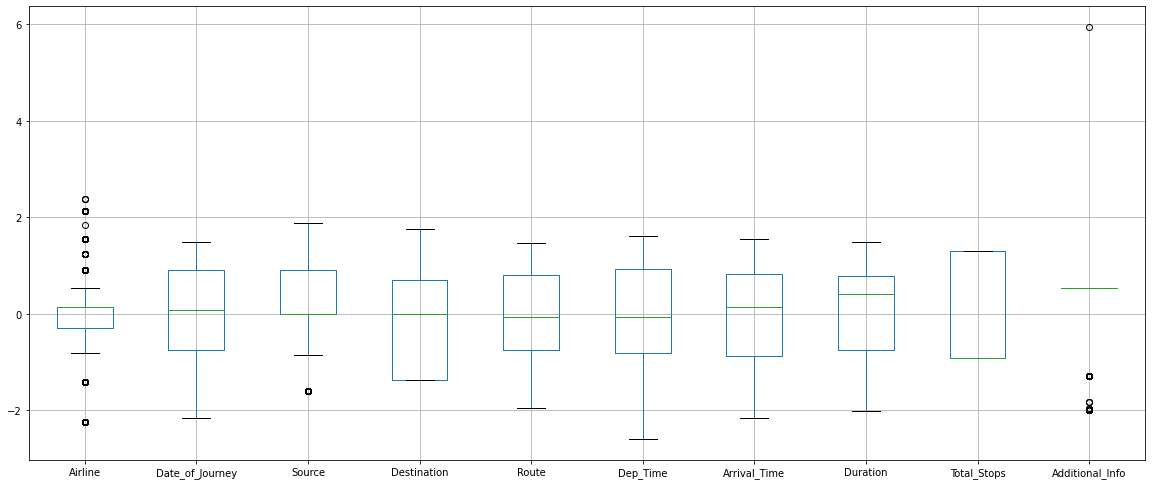

In [59]:
#plotting boxplot for outliers
x.boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

there are few outliers so lets leave for now

# Data Scaling

In [60]:
#data scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [61]:
x_scaled=scaler.fit_transform(x)
x_std=scaler.fit_transform(data_test)

In [62]:
x_scaled

array([[-0.29567552,  0.07296571, -1.59965221, ...,  0.45982688,
         1.29351949,  0.52473404],
       [-1.4204747 , -1.48145831,  0.90201529, ...,  1.2396963 ,
         0.35542865,  0.52473404],
       [ 0.14759112,  1.48497026, -0.01209588, ..., -0.74653779,
         0.35542865,  0.52473404],
       ...,
       [ 0.14759112,  0.45927277, -1.59965221, ...,  0.79094176,
         1.29351949,  0.52473404],
       [ 2.12296151, -2.15731369, -1.59965221, ...,  0.44300497,
         1.29351949,  0.52473404],
       [-1.4204747 ,  1.4139297 , -0.01209588, ...,  1.32608588,
         0.35542865,  0.52473404]])

In [63]:
x_std

array([[ 0.01190758,  1.22369005,  0.03256662, ..., -1.69830361,
        -0.792411  ,  0.48039397],
       [-0.42377921, -1.09007765,  0.87708559, ...,  0.83658895,
        -0.792411  ,  0.48039397],
       [ 0.01190758, -0.13265653,  0.03256662, ..., -0.22849195,
        -0.792411  , -2.14897547],
       ...,
       [ 0.01190758,  0.98433477,  0.03256662, ...,  1.15611322,
        -0.792411  ,  0.48039397],
       [-1.29515278,  0.98433477,  0.03256662, ..., -1.16576315,
        -0.792411  ,  0.48039397],
       [ 0.88328115, -0.69115218,  0.03256662, ..., -1.28292205,
        -0.792411  ,  0.48039397]])

# check vif score

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif["Features"]=x.columns

#let's check the values
vif

,vif,Features
0,1.040120,Airline
1,1.115158,Date_of_Journey
2,1.783563,Source
3,1.819108,Destination
4,1.393620,Route
5,1.034406,Dep_Time
6,1.019930,Arrival_Time
7,1.099959,Duration
8,1.352893,Total_Stops
9,1.064411,Additional_Info


all the vif values are less than 5 so there is no multicollinearity

# training process

In [65]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [66]:
#finding  best random state
maxAccu=0     #maximum accuracy
maxRS=0       #best random state value for which max accuracy is achieved

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is :",maxAccu,"on Random_state",maxRS)

Best Accuracy is : 0.36123907260235977 on Random_state 47


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=47)

In [68]:
x_train

array([[-0.29567552, -2.0254673 , -1.59965221, ...,  0.97716449,
        -0.90581149,  0.52473404],
       [ 0.14759112, -0.6617384 , -0.01209588, ..., -1.39028653,
         0.35542865, -1.96749425],
       [ 0.9059307 ,  1.27093394, -0.01209588, ...,  1.16068748,
        -0.90581149,  0.52473404],
       ...,
       [-0.29567552, -0.6617384 , -0.01209588, ...,  0.80724863,
         1.29351949,  0.52473404],
       [ 1.5520309 ,  1.48497026, -1.59965221, ...,  0.46822773,
         1.29351949,  0.52473404],
       [-1.4204747 , -1.38354679, -0.01209588, ..., -1.54528877,
        -0.90581149,  0.52473404]])

In [69]:
x_test

array([[ 0.14759112,  0.30627877, -0.01209588, ..., -0.7073631 ,
        -0.90581149, -1.96749425],
       [-0.29567552, -0.74749564, -0.01209588, ..., -1.14578667,
        -0.90581149,  0.52473404],
       [-1.4204747 ,  1.19896125,  0.90201529, ...,  0.2732449 ,
        -0.90581149,  0.52473404],
       ...,
       [ 0.9059307 ,  0.30627877, -0.01209588, ...,  1.14483019,
        -0.90581149,  0.52473404],
       [ 0.14759112, -0.576954  , -1.59965221, ...,  1.16860911,
        -0.90581149,  0.52473404],
       [-0.29567552,  0.90767745,  0.90201529, ...,  0.4261559 ,
         1.29351949,  0.52473404]])

In [70]:
y_train

693       693
9435     1136
1006     1511
3007     1528
10404     366
         ... 
2896      550
8883      475
6728      268
1926       72
5255      642
Name: Price, Length: 8011, dtype: int64

In [71]:
y_test

197      1054
3002      435
2202      669
5273      568
4256      528
         ... 
1526     1105
8910      582
887       980
1225     1319
10194     280
Name: Price, Length: 2671, dtype: int64

In [72]:
lr.fit(x_train,y_train)

LinearRegression()

In [73]:
#Ajusted r2 score
lr.score(x_train,y_train)*100

32.42073667138952

let's check how well it fits the test data

In [75]:
lr.score(x_test,y_test)*100

36.123907260235974

# cross validation of the model

In [76]:
train_accuracy=lr.score(x_train,y_train)
test_accuracy=lr.score(x_test,y_test)
from sklearn.model_selection import cross_val_score,GridSearchCV
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
    

0.3319398601545182

In [77]:
y_pred=lr.predict(x_test)

In [78]:
y_pred

array([1101.52142749, 1198.69098464, 1051.4722541 , ..., 1013.28710934,
        951.78071266,  376.00490053])

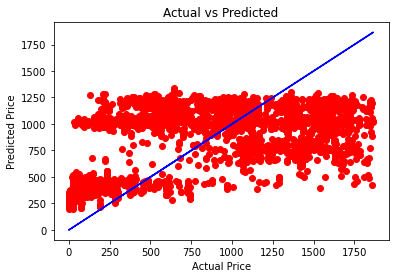

In [79]:
plt.scatter(y_test,y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

# ensemble technique

In [80]:
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [81]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2_score :',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross_val_score :',rfc*100)

R2_score : 91.3675124158197
Cross_val_score : 91.36477358543364


# save the model for later use

In [84]:
import pickle
filename='Flight Price Prediction.pkl'
pickle.dump(rf,open(filename,'wb'))

# Prediction using saved model

In [85]:
loaded_model=pickle.load(open('Flight Price Prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

91.3675124158197


In [86]:
conclusion=pd.DataFrame([loaded_model.predict(x_std)[:],pred_decision[:]],index=["Orignal","Predicted"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670
Orignal,1606.29,141.75,1539.13,951.3975,399.24,1325.17,670.44,508.83,152.23,1609.55,...,1187.479333,18.43,618.64,1488.44,18.94,1003.99,188.61,1625.0600,1387.13,673.93
Predicted,1060.80,459.75,714.80,114.2300,545.54,71.12,169.69,1408.64,693.77,142.01,...,15.900000,695.94,423.55,848.71,1049.52,1137.42,678.89,904.4025,1463.48,175.87
